In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 14 day

In [ ]:
df = pd.read_csv("/content/PCA_14_day_AMZN.csv")
df

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Sentiment_Score,Label
0,0,-8.783929,0.278101,-8.362689,-8.168097,11.924742,4.562152,5.329211,-3.691579,3.816308,12.885902,0.415250,165.593506
1,1,-8.384073,-3.003216,-4.744725,-7.390526,9.553992,4.162481,2.877505,-1.416859,0.345991,-1.232678,0.373860,163.526993
2,2,-8.382625,-4.157028,-4.525115,-6.442743,9.651756,3.947117,2.190436,-1.091929,-0.590288,-3.057083,0.647610,165.318497
3,3,-8.323926,-2.465469,-4.870641,-6.718565,9.211748,3.283849,2.342191,-1.391720,0.817046,-3.025595,0.547200,164.580505
4,4,-8.134489,-0.065510,-5.888150,-5.285885,9.873031,1.809384,1.901484,-1.242487,-0.576791,-1.753210,0.980210,159.524506
...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,639,2.053602,5.341116,-2.569059,1.592075,0.390775,1.232409,-4.048900,0.389384,-1.509929,1.890649,0.192555,143.199997
640,640,1.867481,0.587155,0.713272,-2.110132,-2.376389,4.286987,-2.011113,0.352046,-3.124219,1.664871,0.393230,142.830002
641,641,1.732808,-1.929897,2.056383,-2.548704,-2.101253,3.697896,-2.394742,-0.908320,-0.506751,0.554370,0.223270,145.179993
642,642,1.606903,-2.705493,1.993338,-0.894289,-1.250511,1.500532,-2.778793,-1.710116,0.149375,1.056972,0.191585,146.130005


In [ ]:
X = df.drop(df.columns[[0,-1]], axis=1)
X_train = X.iloc[:int(len(X)*0.8)]
X_test = X.iloc[int(len(X)*0.8):]

y = df[df.columns[-1]]
y_train = y.iloc[:int(len(y)*0.8)]
y_test = y.iloc[int(len(y)*0.8):]

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

# Reshape the data to be 3D for LSTM input (assuming 11 features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=512, return_sequences=True))
model.add(LSTM(units=1024, return_sequences=True))
model.add(LSTM(units=256, return_sequences=True))
model.add(LSTM(units=128))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the scaled predictions to the original scale
predictions = scaler.inverse_transform(predictions)


Epoch 1/20
33/33 [==============================] - 24s 315ms/step - loss: 0.1690 - val_loss: 0.0194
Epoch 2/20
33/33 [==============================] - 6s 197ms/step - loss: 0.0582 - val_loss: 0.0484
Epoch 3/20
33/33 [==============================] - 7s 202ms/step - loss: 0.0179 - val_loss: 0.0275
Epoch 4/20
33/33 [==============================] - 6s 187ms/step - loss: 0.0139 - val_loss: 0.0233
Epoch 5/20
33/33 [==============================] - 8s 230ms/step - loss: 0.0144 - val_loss: 0.0308
Epoch 6/20
33/33 [==============================] - 6s 195ms/step - loss: 0.0126 - val_loss: 0.0231
Epoch 7/20
33/33 [==============================] - 7s 223ms/step - loss: 0.0128 - val_loss: 0.0229
Epoch 8/20
33/33 [==============================] - 5s 164ms/step - loss: 0.0132 - val_loss: 0.0244
Epoch 9/20
33/33 [==============================] - 6s 170ms/step - loss: 0.0131 - val_loss: 0.0217
Epoch 10/20
33/33 [==============================] - 5s 143ms/step - loss: 0.0124 - val_loss: 0.022

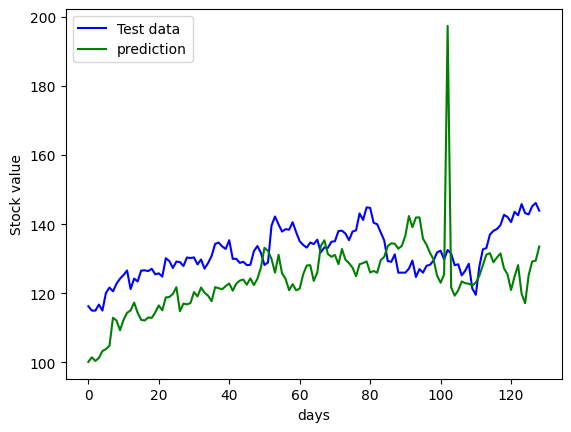

In [ ]:
plt.plot(scaler.inverse_transform(y_test), label='Test data', color='blue')
plt.plot(predictions, label='prediction', color='green')

# Adding labels and a legend
plt.xlabel('days')
plt.ylabel('Stock value')
plt.legend()

# Display the plot
plt.show()

# Next Day

In [ ]:
df = pd.read_csv("/content/PCA_next_day_AMZN.csv")
df

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Sentiment_Score,Label
0,0,-8.818158,0.433785,-8.469637,-8.531736,11.847755,4.156176,5.194408,-4.207631,3.786398,11.409383,0.415250,168.954498
1,1,-8.415479,-2.821847,-4.813165,-7.688982,9.507839,3.803522,2.778297,-1.764291,0.239992,-0.924207,0.373860,169.972000
2,2,-8.417535,-3.974922,-4.605280,-6.714730,9.623680,3.576013,2.116403,-1.437108,-0.815421,-2.732626,0.647610,168.600494
3,3,-8.358006,-2.287722,-4.942720,-7.009802,9.153078,2.946207,2.265764,-1.666284,0.751205,-2.385003,0.547200,166.734497
4,4,-8.169454,0.084481,-5.964375,-5.545988,9.778079,1.445174,1.832696,-1.602706,-0.750701,-1.640430,0.980210,168.100998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,653,-0.713018,-6.698295,-0.424294,2.702942,0.322742,-0.806573,-0.618558,-2.047470,-0.711363,0.643332,0.106975,142.830002
654,654,-0.745831,-5.574220,-1.253944,2.990730,0.183392,-1.070256,-0.661798,-1.860589,-1.877440,-0.179641,0.277745,145.179993
655,655,-0.891486,-6.347549,-0.582196,1.378797,-1.736417,0.012809,-0.061034,-1.065044,-1.463382,0.580907,0.288735,146.130005
656,656,-1.071804,-6.545985,-0.833893,1.478186,-1.623654,-0.338709,-0.094799,-1.281265,-0.947610,0.439638,0.569405,143.899994


In [ ]:
X = df.drop(df.columns[[0,-1]], axis=1)
X_train = X.iloc[:int(len(X)*0.8)]
X_test = X.iloc[int(len(X)*0.8):]

y = df[df.columns[-1]]
y_train = y.iloc[:int(len(y)*0.8)]
y_test = y.iloc[int(len(y)*0.8):]

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

# Reshape the data to be 3D for LSTM input (assuming 11 features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=512, return_sequences=True))
model.add(LSTM(units=1024, return_sequences=True))
model.add(LSTM(units=256, return_sequences=True))
model.add(LSTM(units=128))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the scaled predictions to the original scale
predictions = scaler.inverse_transform(predictions)


Epoch 1/20
33/33 [==============================] - 21s 254ms/step - loss: 0.1703 - val_loss: 0.0192
Epoch 2/20
33/33 [==============================] - 5s 144ms/step - loss: 0.0555 - val_loss: 0.0225
Epoch 3/20
33/33 [==============================] - 6s 170ms/step - loss: 0.0043 - val_loss: 0.0014
Epoch 4/20
33/33 [==============================] - 5s 141ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 5/20
33/33 [==============================] - 5s 141ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 6/20
33/33 [==============================] - 6s 174ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/20
33/33 [==============================] - 5s 142ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/20
33/33 [==============================] - 5s 143ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 9/20
33/33 [==============================] - 6s 192ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 10/20
33/33 [==============================] - 5s 150ms/step - loss: 0.0013 - val_loss: 0.001

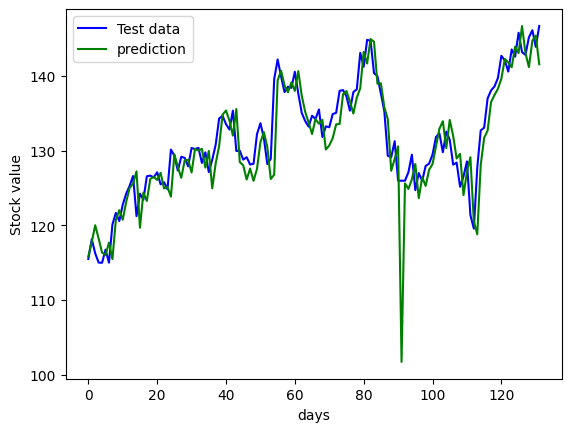

In [ ]:
plt.plot(scaler.inverse_transform(y_test), label='Test data', color='blue')
plt.plot(predictions, label='prediction', color='green')

# Adding labels and a legend
plt.xlabel('days')
plt.ylabel('Stock value')
plt.legend()

# Display the plot
plt.show()